<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 5853: Biostatistics**

##### **Module 3: Inference**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 3 Material

* Part 3.1: Confidence Intervals
* Part 3.2: Hypothesis Testing
* **Part 3.3: Comparison of Two Means**
* Part 3.4: Analysis of Variance (ANOVA)
* Part 3.5: Nonparametric Methods
* Part 3.6: Inference on Proportions
* Part 3.7: Contingency Tables
* Part 3.8: Correlation
* Part 3.9: Simple Linear Regression
* Part 3.10: Multiple Linear Regression
* Part 3.11: Logistic Regression
* Part 3.12: Survival Analysis

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [ ]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

# **Part 3.3: Comparison of Two Means**

In the preceding chapter we used a statistical test of hypothesis to compare the unknown mean of a single population to some fixed, known value $\mu_0$. In practical applications, however, it is far more common to compare the means of two different populations, both of which are unknown.

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 253). CRC Press. Kindle Edition.)

## **Paired Samples**

The distinguishing characteristic of paired samples is that, for each observation in the first group, there is a corresponding observation in the second group. In the technique known as **_self-pairing_**,  measurements are taken on a single subject at two distinct points in time. One common example of self-pairing is the “before and after” experiment, in which each individual is examined before a  treatment or intervention has been applied, and then again after the treatment has been completed. A second type of pairing occurs when an investigator matches the subjects in one group with those in a second group so that the members of a pair are as much alike as possible with respect to important characteristics such as age and sex.  

Pairing is frequently employed in an attempt to control for extraneous sources of variation that might otherwise influence the results of the comparison. If measurements for two groups are made on the same subjects rather than different ones, a certain amount of biological variability is eliminated. We do not have to worry about the fact that one group is older than the other, or that one has more males and the other more females. This helps to make the comparison more precise. 

Consider a population of children with serious heart disease, who have all undergone surgery to correct a congenital defect. Many such children have been observed to have depressed exercise capacity. While this might be due to their heart condition, another contributory factor could be that their parents consider them to be excessively fragile, and therefore restrict their level of physical activity. Among children for whom exercise does not impose a health risk, participation in a rehabilitation program in a safe environment might increase exercise capacity, improving overall health. 

>(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 227). CRC Press. Kindle Edition.) 

### Example 1A: Read Datafile

The code in the cell below uses the Pandas function `pd.read_csv(filename)` to read the data file `pima.csv` stored on the course HTTPS server https://biologicslab.co. As the file is read, it is stored in a Pandas DataFrame called `pimaDF`. 

The code begins by "importing" the Pandas function and assigning it the alias `pd`. 

After the file is read and the DataFrame is created, we use the Python function `display()` to print out a portion of our new DataFrame to make sure it was read correctly. The code in the cell below shows how to use this method with the data stores in `pimaDF`. The `display()` function allows you to control the maximum rows and columns to print. This is useful since many datasets sets have large numbers of rows and columns which can be difficult to print to your computer screen. The code below sets the maximumn number of rows and columns to `6`. 

In [1]:
# Example 1A: Read datafile

import pandas as pd

# Read the datafile 
pwDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/PeakWork.csv",
   # index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 2) 

# Display DataFrame
display(pwDF)

,Sample 1,Sample 2
0,154,165
1,152,181
2,143,157
...,...,...
13,58,68
14,55,69
15,52,60


If the code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image03.png)

### Example 2: Pair-sample Plot

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image01.png)

**FIGURE 11.1** Change in peak work rate from baseline to the end of a 12-week cardiac rehabilitation program for 16 children with serious congenital heart disease  

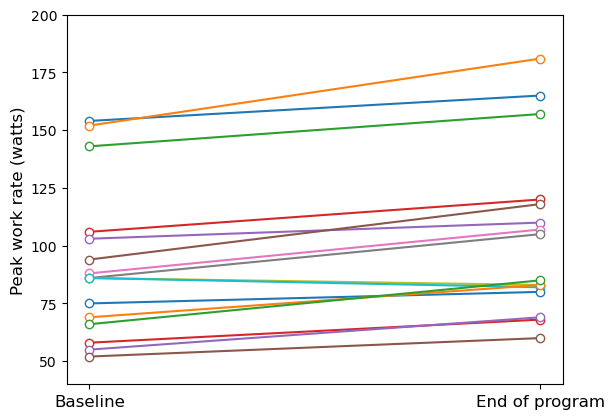

In [165]:
# Example 2: Plot 

import matplotlib.pyplot as plt

# Convert DataFrame to dictionary
data_dict = {f'subject{i+1}': (row['Sample 1'], row['Sample 2']) for i, row in pwDF.iterrows()}
#print(data_dict)

fig, ax = plt.subplots()

# Plotting each subject's baseline and end of program values
for subject, values in data_dict.items():
    plt.plot(['Baseline', 'End of program'], 
             values, marker='o',
             markerfacecolor='white')

# Set the y-axis limits
ax.set_ylim(40, 200)

# Add axis labels
plt.xticks(fontsize=12)
plt.ylabel('Peak work rate (watts)', fontsize=12)

# Set custom y-axis tick locations and labels
plt.yticks([50, 75, 100, 125, 150, 175, 200], 
           ['50', '75', '100', '125', '150', '175', '200'])

# Show plat
plt.show()


If the code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image02.png)

# Example 3: 


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image05.png)

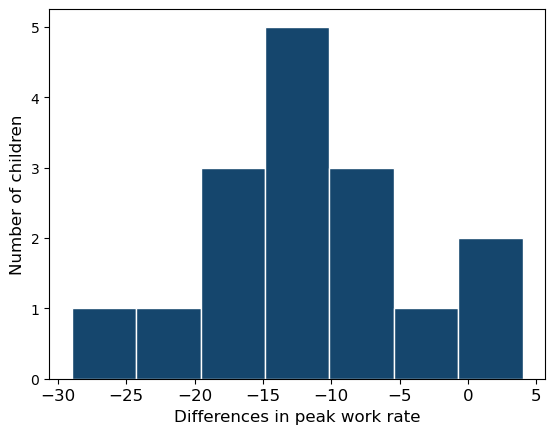

In [7]:
# Example 3: Plot 

import matplotlib.pyplot as plt
import numpy as np

# Define variables
numBins=7
color_1 = '#15466d' # Dark blue

# Create numpy arrays from DataFrame
x1 = pwDF['Sample 1'].to_numpy()
x2 = pwDF['Sample 2'].to_numpy()

# Compute the difference
diff = x1 - x2

# Set-up plot environment
fig, ax = plt.subplots()

# Plot histogram
n, bins, patches = plt.hist(diff, numBins, density=False, 
                            facecolor=color_1,
                            edgecolor="white",
                            alpha=1.0)
# Turn off grid
plt.grid(False)

# Add axis labels
plt.xticks(fontsize=12)
plt.xlabel('Differences in peak work rate', fontsize=12)
plt.ylabel('Number of children', fontsize=12)

# Show plot
plt.show()


If the code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image04.png)

In [166]:
# Example X: Paired-sample t-Test

import numpy as np
import scipy.stats as stats

pre_ = pwDF['Sample 1'].to_numpy()
post_ = pwDF['Sample 2'].to_numpy()

mean_diff = np.mean(pre_ - post_)

# Perform the paired sample t-test
t_stat, p_value = stats.ttest_rel(pre_, post_)

print("----Performing Paired-Sampe t-Test---------------------")
print(f'Mean difference: {mean_diff:.2f}')
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.5f}')


----Performing Paired-Sampe t-Test---------------------
Mean difference: -12.50
T-statistic: -5.67
P-value: 0.00004


![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image06.png)

## **Independent Samples**

Now suppose that we are interested in comparing health-related quality of life for two distinct populations of adults undergoing liver transplantation. After surgery, one group receives usual care, and the  other is treated with a combined intervention of exercise and dietary counseling. Six months after surgery, all patients complete the Medical Outcomes Study Short Form questionnaire (sf-36), which provides summary scores measuring both physical and mental health. The mental component  summary (mcs) score – which incorporates information about social functioning, limitations due to emotional problems, general mental health, and vitality – is scaled to have an approximately normal distribution in the general population. Higher scores indicate better health. In this study, the two underlying populations of mcs scores are independent. (For each observation in the first group, there is not a corresponding observation in the second group.) If the population of liver transplant patients treated by usual care has mean mcs score $\mu_1$ and the population treated with exercise and dietary counseling has mean $\mu_2$, we might again be interested in testing the null hypothesis that the two population means are identical.This can be expressed as either 

$$ H_0: \mu_1 - \mu_2 = 0 $$

or  

$$ H_0:  \mu_1 = \mu_2 $$

The alternative hypothesis is  

$$ H_A: \mu_1 \not= \mu_2 = 0 $$

or  

$$ H_A: \mu_1 \not= \mu_2.  $$

From the population with mean $\mu_1$ and standard deviation $\sigma_1$ we draw a random sample of size $n_1$. The mean of this sample is denoted by $\bar{x}_1$ and its standard deviation by $s_1$. Similarly, we  select a random sample of size $n_2$ from the population with mean $\mu_2$ and standard deviation $\sigma_2$. The mean of this sample is represented by $\bar{x}_2$ and its standard deviation by $s_2$. Note that the numbers of observations in each sample – $n_1$ and $n_2$ – need not be the same. 

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image07.png)

## **Equal Variance**

We first consider the situation in which it is either known or is reasonable to assume that the two  population variances are identical. Recall that, for a single population with mean $\mu$ and standard deviation $\sigma$, the central limit theorem states that the sample mean $X$ is approximately normally  distributed – assuming that $n$ is large enough – with mean $\mu$ and standard error $\sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}}
$. As  a result,  

$$ Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} $$

### Example X: Calculate Margin of Error

If you happen to know the standard deviation $σ$ of the sampling distribution of the mean, you should use the **_one-sample z-test_** for hypothesis testing using this equation:

$$ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $$

is the outcome of a standard normal random variable. When we are dealing with samples from two independent populations, an extension of the central limit theorem says that the difference in sample means $\bar{X}_1 − \bar{X}_2$ is approximately normal with mean $\mu_1 - \mu_2$ and the standard error $\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$


In [167]:
# Example X: Calculate margin of error

import math

# Define values
mean = 49.3
std_dev = 11.6
n = 70
confidence_level = 0.95

# Z-score for 95% confidence level
z_score = 1.96

# Calculate the standard error
standard_error = std_dev / math.sqrt(n)

# Calculate the margin of error
margin_of_error = z_score * standard_error

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the results
print("----Solving Margin of Error-----------------------------")
print(f"Mean (x\u0305) = {mean:.2f}")
print(f"Standard deviation (s) = {std_dev:.2f}")
print(f"Sample size (n) = {n}.")
print(f"95% Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")
print(f"Margin of Error: {margin_of_error:.2f}")


----Solving Margin of Error-----------------------------
Mean (x̅) = 49.30
Standard deviation (s) = 11.60
Sample size (n) = 70.
95% Confidence Interval: (46.583, 52.017)
Margin of Error: 2.72


If the code is correct, you should see the following output:
~~~text
----Solving Margin of Error-----------------------------
Mean (x̅) = 49.30
Standard deviation (s) = 11.60
Sample size (n) = 70.
95% Confidence Interval: (46.583, 52.017)
Margin of Error: 2.72
~~~

In [168]:
# Insert your code for Exercise X here

import math

# Define values
pop_mean = 53.3
std_dev = 7.8
n = 49
confidence_level = 0.95

# Z-score for 95% confidence level
z_score = 1.96

# Calculate the standard error
standard_error = std_dev / math.sqrt(n)

# Calculate the margin of error
margin_of_error = z_score * standard_error

# Calculate the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the results
print("----Solving Margin of Error-----------------------------")
print(f"Mean (x\u0305) = {mean:.2f}")
print(f"Standard deviation (s) = {std_dev:.2f}")
print(f"Sample size (n) = {n}.")
print(f"95% Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")
print(f"Margin of Error: {margin_of_error:.2f}")


----Solving Margin of Error-----------------------------
Mean (x̅) = 49.30
Standard deviation (s) = 7.80
Sample size (n) = 49.
95% Confidence Interval: (47.116, 51.484)
Margin of Error: 2.18


If your code is correct, you should see the following output:
~~~text
----Solving Margin of Error-----------------------------
Mean (x̅) = 49.30
Standard deviation (s) = 7.80
Sample size (n) = 49.
95% Confidence Interval: (47.116, 51.484)
Margin of Error: 2.18
~~~

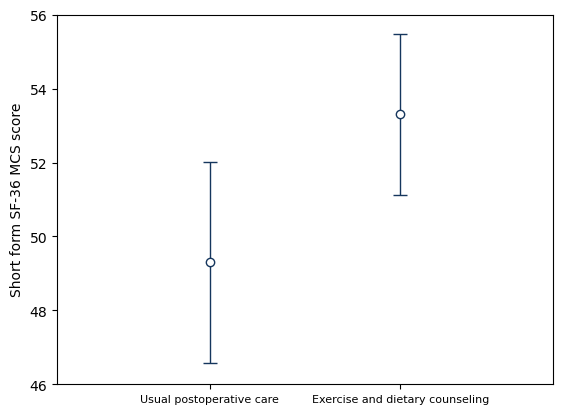

In [169]:
# Example 

import matplotlib.pyplot as plt

# Set color
color_1 = '#15365d' # Dark blue

# Data
categories = ['Usual postoperative care', 'Exercise and dietary counseling']
means = [49.3, 53.3]  # Mean values
margin_errors = [2.72, 2.18]  # Margin of error

# Set plot environment
fig, ax = plt.subplots()

# Plot error bars
ax.errorbar(positions, means, 
             yerr=margin_errors, fmt='o', 
             capsize=5, 
             elinewidth=1,
             ecolor=color_1,
             markeredgecolor=color_1,
             markerfacecolor='white',
             markeredgewidth=1)

# Labeling Axes
plt.ylabel('Short form SF-36 MCS score')

# Adjust the spacing between categories
ax.set_xticks(positions,categories,fontsize=8)
ax.set_xlim(0.2, 2.8)

# Set Y-axis limits
plt.ylim(46, 56)

# Show plot
plt.show()


If the code is correct, you should see the following table.

![____](https://biologicslab.co/BIO5853/images/module_03/lesson_03_3_image09.png)

## **Unequal Variance**

We now turn to the situation in which the variances of the two populations are not assumed to be  equal. In this case, a modified version of the two-sample t-test – sometimes called Welch’s t-test –  must be applied. Instead of using s 2  p as an estimate of the common variance σ 2, we substitute s 2  1  for σ 2  1 and s 2  2 for σ 2  2. Therefore, the appropriate test statistic is  t  =  (x¯1 − x¯2) − (µ1 − µ2)  q  (s  2  1 /n1) + (s 2  2 /n2)  . 


$$ z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} $$ 

$$ Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} $$

has an approximate standard normal distribution if the value of _n_ is sufficiently large. For a given  sample with mean $\bar{x}$, we can calculate the corresponding outcome of $Z$, called the test statistic. We can then use a computer program to determine the probability of obtaining a value of Z that is as extreme or more extreme than the one observed. By “more extreme,” we mean farther away from $µ_0$ in the direction of the alternative hypothesis. Because it relies on the standard normal distribution, a test of this kind is called a **_one-sample z-test_**.  

When the population standard deviation is not known, we substitute the sample value $s$ for $σ$. If the underlying population is normally distributed, the random variable  

$$ t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} $$

has a _t_ distribution with n − 1 degrees of freedom. In this case, we can calculate the outcome of _t_  corresponding to a given $\bar{x}$ and consult our computer program to find the probability of obtaining a sample mean that is more extreme than the one observed. This procedure is known as a **_one-sample t-test_**. 

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 230). CRC Press. Kindle Edition.) 


## **Sample Size Estimate for Two Means**

The method developed in Chapter 10 for determining the sample size necessary to achieve a certain power when conducting a one-sample hypothesis test for a mean can be extended for two-sample tests on means. The specific formula used depends on whether we are working with paired or independent samples. Considering paired samples first, return to the study of children with serious heart disease who participated in a 12-week exercise rehabilitation program. We conducted a paired _t_-test to evaluate the null hypothesis that $\delta$, the mean difference in peak work rate from baseline to the end  of the program, is equal to 0. The alternative hypothesis was that $\delta$ is not equal to $\theta$ 0. When planning this study, before collecting any data, the investigators might have wished to determine the sample size necessary to provide 80% power to reject the null hypothesis if the true mean difference was as high as 6 watts. Recall that 80% power means that if the null hypothesis is false, the probability is `0.80` that it will be rejected. For a one-sample test, two-sided test on a mean, the formula for calculating sample size is  

$$ n = \left( \frac{(Z_{1-\alpha/2} + Z_{1-\beta}) \cdot \sigma}{\mu_1 - \mu_0} \right)^2 $$

Where:

* $Z_{1-\alpha/2}$ is the Z-score for the desired confidence level.
* $Z_{1-\beta}$ is the Z-score for the desired power.
* $\sigma$ is the standard deviation.
* $\mu_1 - \mu_0$ is the difference in means.




$$ n = \left( \frac{(Z_{1-\alpha/2} + Z_{1-\beta}) \cdot \sigma}{\mu_1 - \mu_0} \right)^2 $$

Where:

* $Z_{1-\alpha/2}$ is the Z-score for the desired confidence level.
* $Z_{1-\beta}$ is the Z-score for the desired power.
* $\sigma$ is the standard deviation.
* $\mu_1 - \mu_0$ is the difference in means.

In [172]:
# Example 

import math
from scipy.stats import norm

def calculate_sample_size(alpha, power, sigma, delta):
    # Z-score for the desired confidence level (1 - alpha/2)
    z_alpha = norm.ppf(1 - alpha / 2)
    
    # Z-score for the desired power (1 - beta)
    z_beta = norm.ppf(power)
    
    # Calculate the sample size
    n = ((z_alpha + z_beta) * sigma / delta) ** 2
    
    return math.ceil(n)

# Example parameters
alpha = 0.05  # significance level
power = 0.8   # desired power
sigma = 11.6  # standard deviation
delta = 5.0   # difference in means

sample_size = calculate_sample_size(alpha, power, sigma, delta)

print("----Solving Sample Size-----------------------------")
print(f"Significance level = {alpha:.2f}")
print(f"Power = {power:.2f}")
print(f"Standard deviation = {sigma:.2f}")
print(f"Difference in means = {delta:.2f}")
print(f"Minimum sample size = {sample_size}")


----Solving Sample Size-----------------------------
Significance level = 0.05
Power = 0.80
Standard deviation = 11.60
Difference in means = 5.00
Minimum sample size = 43


In [ ]:
# Example 1: Compute Z score

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Sample data
sample_size = 12         # Sample size (n)
sample_mean = 217        # Sample mean (x̄)

# Calculate the population mean 
population_mean = np.mean(serumChol)

# Calculate the population standard deviation
population_std =  np.std(serumChol)

# Calculate the z-score
z_score = (sample_mean - population_mean)/(population_std/(np.sqrt(sample_size)))

# Calculate the area to the right of the z-score
area_right = 1 - norm.cdf(z_score)

# Calculate the p-value
p_value = 2*area_right

print("----Solving Hypothesis Test-----------------------------")
print(f"The population mean (µ) = {population_mean:.2f} mg/100ml.")
print(f"The population standard deviation (σ) = {population_std:.2f} mg/100ml.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} mg/100ml.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The z-score = {z_score:.2f}")
print(f"The area to the right = {area_right:.3f}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from µ.")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly different from µ.")
print(" ")


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 217.00 mg/100ml.
The sample size = 12.
----Results---------------------------------------------
The z-score = 0.45
The area to the right = 0.327
The p-value = 0.6548271145555575
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly different from µ.
~~~

The output exactly matches the solution derived in your textbook on page 231.

> Based on this sample, the evidence is not sufficient to conclude that the mean serum  cholesterol level of the population of hypertensive smokers is different from 211 mg/100 ml.  

### **Exercise 1A: Hypothesis Testing: One-Sample Z-test**

In the cell below, perform a one-sample Z-test for a sample mean (_n_=12) for serum cholesterol of 226 mg/100ml. 

In [ ]:
# Insert your code for Exercise 1A here

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Sample data
sample_size = 12         # Sample size (n)
sample_mean = 226        # Sample mean (x̄)

# Calculate the population mean 
population_mean = np.mean(serumChol)

# Calculate the population standard deviation
population_std =  np.std(serumChol)

# Calculate the z-score
z_score = (sample_mean - population_mean)/(population_std/(np.sqrt(sample_size)))

# Calculate the area to the right of the z-score
area_right = 1 - norm.cdf(z_score)

# Calculate the p-value
p_value = 2*area_right

print("----Solving Hypothesis Test-----------------------------")
print(f"The population mean (µ) = {population_mean:.2f} mg/100ml.")
print(f"The population standard deviation (σ) = {population_std:.2f} mg/100ml.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} mg/100ml.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The z-score = {z_score:.2f}")
print(f"The area to the right = {area_right:.3f}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from µ.")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly different from µ.")
print(" ")


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 226.00 mg/100ml.
The sample size = 12.
----Results---------------------------------------------
The z-score = 1.12
The area to the right = 0.130
The p-value = 0.2609676294326917
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly different from µ.
~~~

According to your Z-test, a sample mean of 226 mg/100ml, computed from 12 samples, is **_not_** significantly different from the population mean of 211 mg/100ml.

### **Exercise 1B: Hypothesis Testing: One-Sample Z-test**

In the cell below, repeat your one-sample Z-test for sample mean of 226 mg/100ml, but this time increase the sample size from 12 to 40. 

In [ ]:
# Insert your code for Exercise 1B here

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Sample data
sample_size = 40         # Sample size (n)
sample_mean = 226        # Sample mean (x̄)

# Calculate the population mean 
population_mean = np.mean(serumChol)

# Calculate the population standard deviation
population_std =  np.std(serumChol)

# Calculate the z-score
z_score = (sample_mean - population_mean)/(population_std/(np.sqrt(sample_size)))

# Calculate the area to the right of the z-score
area_right = 1 - norm.cdf(z_score)

# Calculate the p-value
p_value = 2*area_right

print("----Solving Hypothesis Test-----------------------------")
print(f"The population mean (µ) = {population_mean:.2f} mg/100ml.")
print(f"The population standard deviation (σ) = {population_std:.2f} mg/100ml.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} mg/100ml.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The z-score = {z_score:.2f}")
print(f"The area to the right = {area_right:.3f}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from µ.")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly different from µ.")
print(" ")


If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test-----------------------------
The population mean (µ) = 211.06 mg/100ml.
The population standard deviation (σ) = 46.05 mg/100ml.
You are testing a sample mean (x̅) = 226.00 mg/100ml.
The sample size = 40.
----Results---------------------------------------------
The z-score = 2.05
The area to the right = 0.020
The p-value = 0.040137676983151405
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from µ.
~~~

This time, a sample mean of 226 mg/100ml, computed from **_40_** samples, is **_significantly different_** from the population mean of 211 mg/100ml. 

Why? 

Mathematically, as the sample size (_n_) increases the value of $\sqrt{n}$ increases:

$$ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $$

making the z statistic _larger_. (Note that $\sqrt{n}$ is in a denominator of the equation's denominator).

As the value of the z-statistic grows, the _p_-value rapidly becomes smaller and smaller. 

Logically, this should make sense. Larger sample sizes reduce the standard error of the mean (SE) making the estimate of the sample mean more precise.


### Example 2: Hypothesis Testing: One-Sample t-test

As discussed above, performing a hypothesis test using Z-scores is permissible _only_ if you know the population's standard deviation, $\sigma$. Otherwise, you are forced to use the **_One-Sample t-test_** which substitutes the sample's standard deviation, _s_, for the population's standard deviation, $\sigma$.

In this example, we will use a one-sample _t_-test to test the null hypothesis

$$  H_0: µ = 4.13 µg/l. $$

and the alternative is

$$ H_A: µ \not= 4.13 µg/l. $$

This example shows how to use Python so work the example on page 232 in your textbook. The example reads as follows:

>    As a second example, consider the random sample of 10 children selected from the population of infants receiving antacids that contain aluminum. The underlying distribution of plasma aluminum levels for this population is approximately normal with an unknown mean $\mu$ and standard deviation $\sigma$. However, we do know that the mean plasma aluminum level for the sample of size 10 is $\bar{x}$ = 37.20 µg/l and that its standard deviation is $s$ = 7.13 µg/l. Furthermore, the mean plasma aluminum level for the population of infants not receiving antacids is 4.13 µg/l. Is it possible that the data in our sample could have come from a population with mean $\mu$ = 4.13 µg/l?

>   We are interested in deviations from the mean which could occur in either direction; we would want to know if $\mu$ is actually larger than 4.13 or if it is smaller. Therefore, we conduct a two-sided test at the α = 0.05 level of significance.  Because we do not know the population standard deviation $\sigma$, we use a one-sample t-test rather than a one-sample z-test.

_Code Description:_

The code basically uses the following equation to solve this problem:

$$ t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} $$

using the following code chunk:
~~~text
# Calculate t-statistic
t_statistic = (sample_mean - population_mean)/(sample_std/(np.sqrt(sample_size)))
~~~

The t-statistic is then used to find the _p_-value using the `stats.t.sf()` function:
~~~text
# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2
~~~


In [ ]:
# Example 2: Hypothesis Testing: One-Sample t-test

import numpy as np
import scipy.stats as stats

# Define alpha
alpha=0.05

# Sample data
sample_size = 10      # Sample size (n)
sample_mean = 37.20   # Sample mean (x̄)
sample_std = 7.13     # Sample standard deviation (s)
df = sample_size - 1  # Degrees of freedom

# Calculate the population mean 
population_mean = np.mean(plasmaAlum)

# Calculate t-statistic
t_statistic = (sample_mean - population_mean)/(sample_std/(np.sqrt(sample_size)))

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2

print("----Solving Hypothesis Test---------------------------------")
print(f"The population mean (µ\u2080) = {population_mean:.2f} µg/l.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} µg/l.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The t-statistic = {t_statistic:.2f}")
print(f"The degrees of freedom = {df}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from the population mean (µ\u2080).")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly from the population mean (µ\u2080).")
print(" ")

If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 37.20 µg/l.
The sample size = 10.
----Results---------------------------------------------
The t-statistic = 14.67
The degrees of freedom = 9
The p-value = 1.3720393176933629e-07
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from the population mean (µ₀).
~~~

The results shown in the output match the results presented in your textbook on page 232. 

The _p_-value is **very** small. To convert this to a standard decimal form, you would move the decimal point 7 places to the left:

$$ p-value = 0.00000013720393176933629 $$

In other words, the probability that you could have gotten a sample mean for plasma aluminum due to "sampling error" is extremely unlikely. 

Therefore, we reject the null hypothesis:

$$  H_0: µ = 4.13 µg/l. $$

and therefore we must accept the alternative hypothesis:

$$ H_A: µ \not= 4.13 µg/l. $$

This sample of infants provides evidence that the mean plasma aluminum level of children receiving antacids is not equal to the mean aluminum level of children who do not receive them. In fact, since  the sample mean $\bar{x}$ is larger than $µ_0$, the true mean aluminum level is higher than 4.13 µg/l.

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 232). CRC Press. Kindle Edition.) 

### **Exercise 2A: Hypothesis Testing: One-Sample t-test**

Aluminum is commonly used in antacids in the form of aluminum hydroxide. This compound works by neutralizing stomach acid, which helps to relieve symptoms of heartburn, acid indigestion, and upset stomach. When aluminum hydroxide reacts with stomach acid, it forms aluminum chloride and water, which increases the pH of the stomach contents, making it less acidic.

Suppose you obtain a sample from 12 infants who received antacids containing aluminum from a different pharmaceutical company that used aluminum carbonate instead of aluminum hydroxide. The mean plasma aluminum concerntration in these 12 infants was 8.5 µg/l. 

In the cell below, test the following hypotheses concerning the plasma concentration of aluminum in these infants:

$$  H_0: µ = 4.13 µg/l. $$

and the alternative hypothesis:

$$ H_A: µ \not= 4.13 µg/l. $$


In [ ]:
# Insert your code for Exercise 2A here

import numpy as np
import scipy.stats as stats

# Define alpha
alpha=0.05

# Sample data
sample_size = 12      # Sample size (n)
sample_mean = 8.5     # Sample mean (x̄)
sample_std = 7.13     # Sample standard deviation (s)
df = sample_size - 1  # Degrees of freedom

# Calculate the population mean 
population_mean = np.mean(plasmaAlum)

# Calculate t-statistic
t_statistic = (sample_mean - population_mean)/(sample_std/(np.sqrt(sample_size)))

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2

print("----Solving Hypothesis Test---------------------------------")
print(f"The population mean (µ\u2080) = {population_mean:.2f} µg/l.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} µg/l.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The t-statistic = {t_statistic:.2f}")
print(f"The degrees of freedom = {df}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from the population mean (µ\u2080).")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly from the population mean (µ\u2080).")
print(" ")

If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 8.50 µg/l.
The sample size = 12.
----Results---------------------------------------------
The t-statistic = 2.12
The degrees of freedom = 11
The p-value = 0.05743990643816894
----Interpretation--------------------------------------
Failed to reject the null hypothesis.
The sample mean (x̅) is not significantly from the population mean (µ₀).
~~~

The results shown in the output show that the _p_-value value (0.05744) is slightly larger than our value for alpha (0.05000) . 

In other words, the probability that you could have gotten a sample mean for plasma aluminum due to "sampling error" is not likely, but it could happen. 

Therefore, we **_fail_** to reject the null hypothesis:

$$  H_0: µ = 4.13 µg/l. $$


### **Exercise 2B: Hypothesis Testing: One-Sample t-test**

Suppose you decide to obtain a larger sample of infants who received antacids containing aluminum from a different pharmaceutical company that used aluminum carbonate instead of aluminum hydroxide. You measure the plasma from 20 infants and determine the mean plasma aluminum concerntration was 7.8 µg/l. 

In the cell below, repeat your hypothesis testing concerning the plasma concentration of aluminum in this new sample of 20 infants:

$$  H_0: µ = 4.13 µg/l. $$

and the alternative hypothesis:

$$ H_A: µ \not= 4.13 µg/l. $$


In [ ]:
# Insert your code for Exercise 2A here

import numpy as np
import scipy.stats as stats

# Define alpha
alpha=0.05

# Sample data
sample_size = 20      # Sample size (n)
sample_mean = 7.8     # Sample mean (x̄)
sample_std = 7.13     # Sample standard deviation (s)
df = sample_size - 1  # Degrees of freedom

# Calculate the population mean 
population_mean = np.mean(plasmaAlum)

# Calculate t-statistic
t_statistic = (sample_mean - population_mean)/(sample_std/(np.sqrt(sample_size)))

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t_statistic), df) * 2

print("----Solving Hypothesis Test---------------------------------")
print(f"The population mean (µ\u2080) = {population_mean:.2f} µg/l.")
print(f"You are testing a sample mean (x\u0305) = {sample_mean:.2f} µg/l.")
print(f"The sample size = {sample_size}.")
print("----Results---------------------------------------------")
print(f"The t-statistic = {t_statistic:.2f}")
print(f"The degrees of freedom = {df}")
print(f"The p-value = {p_value}")
print("----Interpretation--------------------------------------")
if p_value < alpha:
    print(f"Reject the null hypothesis!")
    print(f"The sample mean (x\u0305) is significantly different from the population mean (µ\u2080).")
else:
    print(f"Failed to reject the null hypothesis.")
    print(f"The sample mean (x\u0305) is not significantly from the population mean (µ\u2080).")
print(" ")

If the code is correct, you should see the following output:

~~~text
----Solving Hypothesis Test---------------------------------
The population mean (µ₀) = 4.13 µg/l.
You are testing a sample mean (x̅) = 7.80 µg/l.
The sample size = 20.
----Results---------------------------------------------
The t-statistic = 2.30
The degrees of freedom = 19
The p-value = 0.03298416961587437
----Interpretation--------------------------------------
Reject the null hypothesis!
The sample mean (x̅) is significantly different from the population mean (µ₀).
~~~

The results shown in the output show that the _p_-value value (0.03298) is slightly less than our value for alpha (0.05000) . 

In other words, the probability that you could have gotten a sample mean for plasma aluminum due to "sampling error" is now considered to be unlikely enough that we can reject the null hypothesis:

$$  H_0: µ = 4.13 µg/l. $$

and must except the alternative hypothesis:

$$ H_A: µ \not= 4.13 µg/l. $$

#### **What You Should Conclude**

1. **Sample Size Can Be Extremely Important:** Even thought the mean plasma aluminum concentration of the larger sample (7.80 µg/l, _n_=20) was closer to the "true" mean (4.13), the hypothesis test found a significance difference, whereas the higher value in the smaller sample  (8.5 µg/l, _n_=12) was not found to be significantly different.
2. **_p_-values Are Everything?:** The magic words _statistically significant_ hinges on the _p_-value. If the _p_-value is less than 0.05, you can publish your results otherwise all of your hard work is "useless". Rarely do scientific journals publish results that are not "statistically significant". But please read the next section about the **_Misuse of the p-values_**. 

--------------------------------------

#### **The Misuse of _p_-values**

Unfortunately, _p_-values are commonly misused and misinterpreted in practice. A _p_-value is a measure of the strength of the evidence against the null hypothesis, with smaller _p_-values indicating stronger evidence against $H_0$. Because it is a probability, a _p_-value is continuous. Even though it is customary to report whether results are statistically significant or not, we must take care not to rely exclusively on a rigid division of study conclusions into two distinct boxes. In response to what many consider to be an over-simplification when reporting results, the American Statistical Association released a statement on statistical significance and _p_-values which clarifies several important points about what _p_-values can and cannot do in practice.  
1. _P_-values can indicate how incompatible the data are with a specified statistical model.
2. _P_-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
3. Scientific conclusions and business or policy decisions should not be based only on whether a _p_-value passes a specific threshold.
4. Proper inference requires full reporting and transparency.
5. A _p_-value, or statistical significance, does not measure the size of an effect or the importance of a result.
6. By itself, a _p_-value does not provide a good measure of evidence regarding a model or hypothesis. 

(Pagano, Marcello; Gauvreau, Kimberlee; Mattie, Heather. Principles of Biostatistics (p. 229). CRC Press. Kindle Edition.) 

---------------------------------------

**Summary of One-Sample, Two-sided Hypothesis Tests for the Mean**

Here is table from page 232 in your textbook that summarizes one-sample, two-sided hypothesis tests for the mean.
![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image02.png)

## **Types of Error**

In hypothesis testing, there are two main types of statistical errors:

1. **Type I Error (False Positive):**
* **Definition:** Occurs when the null hypothesis $(H_0):$ is true, but we incorrectly reject it.
* **Example:** Concluding that a new drug is effective when it actually has no effect.
* **Probability:** Denoted by alpha $(\alpha)$, which is the significance level of the test. For example, if $\alpha = 0.05$, there is a 5% chance of making a Type I error.
2. **Type II Error (False Negative):**
* **Definition:** Occurs when the null hypothesis $(H_0):$ is false, but we fail to reject it.
* **Example:** Concluding that a new drug is not effective when it actually is.
* **Probability:** Denoted by beta $(\beta)$. The power of a test $1 - (\beta)$ is the probability of correctly rejecting a false null hypothesis.

These errors are inversely related; reducing the probability of one increases the probability of the other.


### **Hypothesis Testing with Z-test**

In the next example we see how to use Python to solve the problem in your textbook starting on page 235.

>Consider the case of a drug that has been deemed effective for reducing high blood pressure. After being treated with this drug for a given period of time, a population of individuals suffering from hypertension has mean diastolic blood pressure µd, a value that is clinically lower than the  mean diastolic blood pressure of the untreated hypertensives. Now suppose that another company produces a generic version of the same drug. We would like to know whether the generic drug is as effective at reducing high blood pressure as the brand name version.
>
>To determine this, we examine  the distribution of diastolic blood pressures for a sample of individuals who have been treated with the generic drug; if µ is the mean of this population, we use the sample to test the null hypothesis

$$ H_0: µ = µ_d. $$

>What if the manufacturer of the generic drug actually submits the brand name product for testing  in place of its own version? Vitarine Pharmaceuticals, a New York based drug company, reportedly did just that. In a situation such as this, we know that the null hypothesis must be true; we are testing the drug that itself set the standard. Therefore, if the test of hypothesis leads us to reject $H_0$ and pronounce the “generic” drug to be either more or less efficacious than the brand name version, a type I error has been made.
>
>The second kind of error that can be committed during a hypothesis test is a _type II error_, also known as an _acceptance error_, or a $\beta$ error. A type II error is made if we fail to reject the null hypothesis
>
$$ H0_: µ = µ_0 $$ 

>when $H_0$ is false. The probability of committing a type II error is represented by the Greek letter $\beta$, where
>
$$ \beta = P(\text{do not reject } H_0 \mid H_0 \text{ is false}) $$ 

If $\beta$ = 0.10, for instance, then the probability that we do not reject the null hypothesis

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image01A.png)


### Example 4: One-sided Hypothesis Test

On page 235, your text poses the following problem:
>Recall the distribution of serum cholesterol levels for all 20- to 74-year-old males in the United States. The mean of this population is $\mu$ = 211 mg/100 ml, and the standard deviation is $\sigma$ =  46 mg/100 ml. Suppose that we do not know the true mean of this population; however, we do know that the mean serum cholesterol level for the subpopulation of 20- to 24-year-old males is 180 mg/100 ml. Since older men tend to have higher cholesterol levels than do younger men on average, we would expect the mean cholesterol level of the population of 20- to 74-year-olds to be higher than 180 mg/100 ml. (And indeed it is, although we are pretending not to know this.) Therefore, if  we were to conduct a one-sided test of the null hypothesis

$$ H_0: \mu \leq 180\ \text{mg}/100\ \text{ml} $$  

>against the alternative hypothesis  

$$ H_A: \mu > 180\ \text{mg}/100 \ \text{ml}, $$

>we would expect $H_0$ to be rejected. It is possible, however, that it would not be. The probability of  reaching this incorrect conclusion – a type II error – is $\beta$. 

>What is the value of $\beta$ associated with a test of the null hypothesis  $H_0$: $\mu$ ≤ 180 mg/100 ml, assuming that we select a sample of size 25? To determine this, we first find the mean serum cholesterol level our sample must have in order for $H_0$ to be rejected. Since we are conducting a **_one-sided test_** at the $\alpha$ = 0.05 level of significance, $H_0$ would be rejected for z ≥ 1.645; this is the critical value of the test. Writing out the test statistic

$$ z_{crit} = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $$

>solving for $\bar{x}$ we get the following:

$$ \bar{x} =  \mu_0 +  \frac{z_{crit} \sigma}{ \sqrt{n}} = 195.1 $$

Let's see how we can solve for $\bar{x}$ using Python. Here is the code chunk that performs this calculation:

~~~text
# Compute X bar
Xbar = subpop_mean + (Z_crit * population_std)/np.sqrt(sample_size)
~~~

In [ ]:
# Example 4: Compute xbar

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Define values
Z_crit = 1.645           # One-sided Z critical
sample_size = 25         # Sample size (n)
subpop_mean = 180        # Sample mean (x̄)

# Compute population standard deviation
population_std = np.std(serumChol)  # Population standard deviation

# Compute X bar
Xbar = subpop_mean + (Z_crit * population_std)/np.sqrt(sample_size)

print("----Calculate x\u0305---------------------------------")
print(f"x\u0305 = {Xbar:.2f} mg/100ml.")
print(" ")


If the code is correct, you should see the following output:

~~~text
----Calculate x̅---------------------------------
x̅ = 195.15 mg/100ml.
~~~

The value for $\bar{x}$ of `195.15` is essentially the same as `195.1` given in your textbook as the solution to this problem. 

What `195.1` represents is the _minimum_ serum cholesterol value that any sample mean $\bar{x}$ of size 25 must **_exceed_** in order for us to reject the null hypothesis ($H_0$):

$$ H_0: \mu \leq 180\ \text{mg}/100\ \text{ml} $$  

However, our sample mean $\bar{x}$ = 180 mg/100 ml is clearly less than 195.1, so we have insufficient evidence to reject $H_0$. 

We can visualize this if we plot the value of `195.1` on a sampling distribution of the means, we will created in Example 5.

### **Exercise 4: One-sided Hypothesis Test**

Suppose you obtained serum cholesterol levels from a sample of 25 world class ultramarthon runners with a mean value of 160 mg/100 ml. You would like to know if being an ultramarathon runner **_lowers_** your serum cholesterol compared to the normal population of 20- to 24-year-old males whose mean cholesterol level is 180 mg/100 ml. In the cell below, you are to perform the following hypothesis tests:

$$ H_0: \mu \geq 180\ \text{mg}/100\ \text{ml} $$  

against the alternative hypothesis  

$$ H_A: \mu < 180\ \text{mg}/100 \ \text{ml}, $$

**HINT:** This is really the same problem as was demonstrated in Example 4. However, this time you need to find $\bar{x}$ for the _lower limit_ of the distribution. 

In [ ]:
# Insert your code for Exercise 4 here

import numpy as np
from scipy.stats import norm

# Define alpha
alpha=0.05

# Define values
Z_crit = -1.645          # One-sided Z critical
sample_size = 25         # Sample size (n)
subpop_mean = 180        # Sample mean (x̄)

# Compute population standard deviation
population_std = np.std(serumChol)  # Population standard deviation

# Compute X bar
Xbar = subpop_mean + (Z_crit * population_std)/np.sqrt(sample_size)

print("----Calculate x\u0305---------------------------------")
print(f"x\u0305 = {Xbar:.2f} mg/100ml.")
print(" ")


If your code is correct, you should see the following output:

~~~text
----Calculate x̅---------------------------------
x̅ = 164.85 mg/100ml.
~~~

The value for $\bar{x}$ of `164.85`. Since our ultramarathoners had a mean serum cholesterol level of 160 mg/100 ml, you should **_reject_** the null hypothesis ($H_0$) and accept the alternative hypothesis ($H_A$)

$$ H_A: \mu < 180\ \text{mg}/100 \ \text{ml}, $$

NOTE: You will be asked to generate a plot of this result in **Exercise 5**.

### Example 5: Plot Distribution of Means of Samples

In the previous example (Example 4), we failed to reject the null hypothesis: 

$$ H_0: \mu \geq 180\ \text{mg}/100\ \text{ml} $$  

since our sample mean $\bar{x}$ = 180 mg/100 ml was less than the 95% critical value of `195.1` mg/100ml.

The "trick" used in Example 4 was to recognize that the probability of reaching an incorrect conclusion -- a type II error is $\beta$. Since we are conducting a one-sided test (we only expect $\mu$ ≤ 180 mg/100) we can use our computer to figure out that the critical z-value to ≥ 1.645. 

As shown in **Figure 10.1**, the area to the right of $\bar{x}$ = 195.1 corresponds to the upper 5% of the sampling distribution of means of samples of size 25 when $\mu$ = 180. Therefore, the null hypothesis $H_0$ would only be rejected if our sample mean $\bar{x}$ was greater than 195.1 mg/100 ml.

In your textbook, this result was visualized in **Figure 10.1**

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image03.png)

**FIGURE 10.1**  Distribution of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years of age, $\mu$ = 180 mg/100 ml.

In this example we will recreate this plot using Python. 

_Code Description:_

The code for plotting the distribution of means was previously presented in Lesson_02_2, Example 8. 

We know from the **_Central Limit Theorem (CLT)_**, that _any_ distribution of sample means must be approximately normal, even if the distribution being sampled is not normal (see Lesson_02_3). Therefore, if we need to create a "distribution of means of samples" we can simply generate one using the `scipy.stats` function `y_dat = norm.pdf(x_dat, mu, sd)`. 

As was demonstated in Lesson_02_2, Example 8, you need to define the lower value (`low_val`) and the upper value (`high_val`) of the area you want to be shaded (colored). 

In [ ]:
# Example 5: Plot Distribution of Means of Samples

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu = 180     # mean
sd = 11      # standard deviation

# Define limits of the area to be colored
low_val = 195.1
high_val = 220

# Define chart color
chart_color='#294171'

# Generate x-values between 140 and 220 with .01 steps. 
x_dat = np.arange(140, 220, 0.01) 

# Compute y-value for each x-value 
y_dat = norm.pdf(x_dat, mu, sd)

# Create plot environment
fig, ax = plt.subplots()

# Plot normal distribution
ax.plot(x_dat, y_dat , chart_color)  

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the area under the curve between lower and upper limits
shade_x = np.linspace(low_val, high_val, 100)  # set x area
shade_y = norm.pdf(shade_x, mu, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=chart_color, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 195.1])
ax.set_xticklabels(['180', '195.1'])

# Plot text
plt.text(205, 0.008, '0.05', fontsize=12)   # mu at bottom

# Plot line
x_line=[205, 202]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image04.png)

### **Exercise 5: Plot Distribution of Means of Samples**

For **Exercise 5** you are to plot the distribution of means of samples for your results in **Exercise 4**. In other words, your plot should look exactly like the output above, except that the lower 5% tail will be colored instead of the upper 5%.

**NOTE:** In order to make your plot look correct (see example below) you will need to "fiddle" with the values for positioning the text and the line that connects the text to the graph.

In [ ]:
# Insert your code for Exercise 5 here

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu = 180        # mean
sd = 11         # standard deviation

# Define limits of the area to be colored
low_val = 140
high_val = 164.85

# Define chart color
chart_color='#294171'

# Generate x-values between 140 and 220 with .01 steps. 
x_dat = np.arange(140, 220, 0.01) 

# Compute y-value for each x-value 
y_dat = norm.pdf(x_dat, mu, sd)

# Create plot environment
fig, ax = plt.subplots()

# Plot normal distribution
ax.plot(x_dat, y_dat , chart_color)  

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the area under the curve between lower and upper limits
shade_x = np.linspace(low_val, high_val, 100)  # set x area
shade_y = norm.pdf(shade_x, mu, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=chart_color, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 164.9])
ax.set_xticklabels(['180', '164.9'])

# Plot text
plt.text(148, 0.008, '0.05', fontsize=12)   # mu at bottom

# Plot line
x_line=[155, 159.0]
y_line=[0.008, 0.007]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If your code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image05.png)

It will take some "fiddling" with the code to make your plot look just like this. 

#### **Dual Plots Distribution of Means of Samples**

Recall that the probability of making a type II error, $\beta$, is the probability of not rejecting the null  hypothesis given that $H_0$ is false. Therefore, it is the chance of obtaining a sample mean which is less  than 195.1 mg/100 ml given that the true population mean is not 180 but is instead $\mu_1$ = 211 mg/100 ml. To find the value of $\beta$, we again consider the sampling distribution of means of samples of size 25; this time, however, we let $\mu$ = 211. This distribution is pictured on the right side of **Figure 10.2**. Since a sample mean less than $\bar{x}$ = 195.1 mg/100 ml implies that we do not reject $H_0$, we would  like to know what proportion of this new distribution centered at 211 mg/100 ml lies below 195.1.  

Observe that  

$$ z = \frac{195.1 - 211.0}{46/\sqrt{25}} = -1.73 $$ 

The area under the standard normal curve that lies to the left of $z = −1.73$ is `0.042`. Therefore, $\beta$ – the probability of failing to reject  

$$ H_0: \mu \leq 180 \text{ mg}/100 \text{ ml} $$ 

when the true population mean is $µ_1$ = 211 mg/100 ml – is equal to `0.042`. 

Whereas $\alpha$, the probability of committing a type I error, is determined by looking at the situation in which $H_0$ is true and µ is equal to $µ_0$, $\beta$ is found when $H_0$ is false and $\mu$ does not equal $\mu_0$. If $\mu$ is not equal to $µ_0$, however, there are an infinite number of possible values that $\mu$ could assume. The type II error is calculated for a single such value, $\mu_1$; in the previous example, $\mu_1$ was chosen to be 211 mg/100 ml. (We selected 211 because in this unusual example, we knew it to be the true population mean.) If we had chosen a different alternative population mean, then we would have computed a different value for $\beta$. The closer $\mu_1$ is to $\mu_0$, the more difficult it is to reject the null hypothesis and the higher $\beta$ will be. 

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image07.png)

**FIGURE 10.2** Distributions of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years of age, µ = 180 mg/100 ml versus µ = 211 mg/100 ml 

### Example 6: Dual Plot Distribution of Means of Samples

The code in the cell below shows how to use Python to recreate **Figure 10.2**. 

In [ ]:
# Example 6: Dual Plot Distribution of Means of Samples

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu_1 = 180        # mean
mu_2 = 211
sd = 11          # standard deviation

# Define limits of the area to be colored
low_val_1 = 195.1
high_val_1 = 260

low_val_2 = 140
high_val_2 = 195.1

# Define chart color
chart_color='#294171'
fill_color_1 = chart_color
fill_color_2 = '#298844'

# Generate x-values between 140 and 220 with .01 steps. 
x_dat_1 = np.arange(140, 220, 0.01) 
x_dat_2 = np.arange(180, 260, 0.01) 

# Compute y-value for each x-value 
y_dat_1 = norm.pdf(x_dat_1, mu_1, sd)
y_dat_2 = norm.pdf(x_dat_2, mu_2, sd)

# Create plot environment
fig, ax = plt.subplots()
fig.set_figwidth(10)  # Width is 12 inches

# Plot normal distribution
ax.plot(x_dat_1, y_dat_1, chart_color)
ax.plot(x_dat_2, y_dat_2, chart_color)

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the left area under the curve between lower and upper limits
shade_x = np.linspace(low_val_2, high_val_2, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_2, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=fill_color_2, alpha=1.0)  # fill areas

# Fill the right area under the curve between lower and upper limits
shade_x = np.linspace(low_val_1, high_val_1, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_1, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=fill_color_1, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 195.1, 211])
ax.set_xticklabels(['180', '195.1', '211'])

# Plot text
plt.text(179, 0.008, '0.042', fontsize=12)   # text left
plt.text(205, 0.008, '0.05', fontsize=12)    # text right

# Plot line left
x_line=[187, 190]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Plot line Right
x_line=[205, 202]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

Investigators generally try to design tests of hypotheses so that they have high power. It is not enough to know that we have a small probability of rejecting $H_0$ when it is true; we would also like there to be a large probability of rejecting the null hypothesis when it is false. In most practical applications, a power less than 80% is considered insufficient. 

One way to increase the power of a test is to raise the significance level α. If we increase $\alpha$, then we cut off a smaller portion of the tail of the sampling distribution centered at $µ_1$. Correspondingly, $\beta$ becomes smaller, and the power, 1 − $\beta$, increases. If α had been equal to `0.10` for the test of the null hypothesis

$$ H_0: \mu \leq 180 \text{ mg}/100 \text{ ml} $$ 

for instance, then $\beta$ would have been `0.018` and the power `0.982`. This situation is illustrated in **Figure 10.4**; compare it to **Figure 10.2**, where $\alpha$ was equal to `0.05`.

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image10.png)

**FIGURE 10.4** Distributions of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years of age, $\mu$ = 180 mg/100 ml versus $\mu$ = 211 mg/100 ml 

### Example 6: Dual Plot Distribution of Means of Samples

The code in the cell below shows how to use Python to recreate **Figure 10.2**. 

In [ ]:
# Example 6: Dual Plot Distribution of Means of Samples

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu_1 = 180        # mean
mu_2 = 211
sd = 11          # standard deviation

# Define limits of the area to be colored
low_val_1 = 195.1
high_val_1 = 260

low_val_2 = 140
high_val_2 = 195.1

# Define chart color
color_1 = '#294171'  # dark blue
color_2 = '#297544'  # dark green 

# Generate x-values between 140 and 220 with .01 steps. 
x_dat_1 = np.arange(140, 220, 0.01) 
x_dat_2 = np.arange(180, 260, 0.01) 

# Compute y-value for each x-value 
y_dat_1 = norm.pdf(x_dat_1, mu_1, sd)
y_dat_2 = norm.pdf(x_dat_2, mu_2, sd)

# Create plot environment
fig, ax = plt.subplots()
fig.set_figwidth(10)  # Width is 12 inches

# Plot normal distribution
ax.plot(x_dat_1, y_dat_1, color_1)
ax.plot(x_dat_2, y_dat_2, color_2)

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the left area under the curve between lower and upper limits
shade_x = np.linspace(low_val_2, high_val_2, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_2, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=color_2, alpha=1.0)  # fill areas

# Fill the right area under the curve between lower and upper limits
shade_x = np.linspace(low_val_1, high_val_1, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_1, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=color_1, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 195.1, 211])
ax.set_xticklabels(['180', '195.1', '211'])

# Plot text
plt.text(179, 0.008, '0.042', fontsize=12)   # text left
plt.text(205, 0.008, '0.05', fontsize=12)    # text right

# Plot line left
x_line=[187, 190]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Plot line Right
x_line=[205, 202]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image06.png)

**FIGURE 10.2**  Distributions of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years of age, $\mu$ = 180 mg/100 ml versus $\mu$ = 211 mg/100 ml 


#### **Changing the Power of the Test**

The topic **_Power_** will be discussed in the next section. However, for **Exercise 6** you are asked to plot what happens when you change the power of the hypothesis test shown above in **Figure 10.2**.

Investigators generally try to design tests of hypotheses so that they have high power. It is not enough to know that we have a small probability of rejecting $H_0$ when it is true; we would also like there to be a large probability of rejecting the null hypothesis when it is false. In most practical applications, a power less than 80% is considered insufficient. 

One way to increase the power of a test is to raise the significance level α. If we increase α, then we cut off a smaller portion of the tail of the sampling distribution centered at $µ_1$. Correspondingly, $\beta$ becomes smaller, and the power, 1 − $\beta$, increases. If α had been equal to 0.10 for the test of the null hypothesis

$$ H_0: \mu \leq 180 \text{ mg}/100 \text{ ml} $$ 

for instance, then $\beta$ would have been 0.018 and the power 0.982. This situation is illustrated in **Figure 10.4**; compare it to Figure 10.2, where $\alpha$ was equal to 0.05.

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image10.png)

**FIGURE 10.4**
Distributions of means of samples of size 25 for the serum cholesterol levels of males 20 to 74 years  of age, $\mu$ = 180 mg/100 ml versus $\mu$ = 211 mg/100 ml 

### **Exercise 6: Dual Plot Distribution of Means of Samples**

In the cell below use Python to recreate **Figure 10.4** shown above. 

**HINTS:** For the most part you can simply resuse the code in Example 6 as is. The major change you will need to make is that the x-value at the critical point is now `191.8` instead of the value of `195.1`. The textbook doesn't mention this value in the text, but it's clearly visible in **Figure 10.4**. You will also have to fiddle with the location of the left text ("0.018") and the line that connects it to curve. For the right text, just change the number from `0.05` to read `0.10`. The location of the right text, as well as the location of the line connecting it to the graph stays the same.

In [ ]:
# Insert your code for Exercise 6 here

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm      # normal distribution 

# Define parameters for the normal distribution
mu_1 = 180        # mean
mu_2 = 211
sd = 11          # standard deviation

# Define limits of the area to be colored
low_val_1 = 191.8
high_val_1 = 260

low_val_2 = 140
high_val_2 = 191.8

# Define chart color
color_1 = '#294171'  # dark blue
color_2 = '#297544'  # dark green 

# Generate x-values between 140 and 220 with .01 steps. 
x_dat_1 = np.arange(140, 220, 0.01) 
x_dat_2 = np.arange(180, 260, 0.01) 

# Compute y-value for each x-value 
y_dat_1 = norm.pdf(x_dat_1, mu_1, sd)
y_dat_2 = norm.pdf(x_dat_2, mu_2, sd)

# Create plot environment
fig, ax = plt.subplots()
fig.set_figwidth(10)  # Width is 12 inches

# Plot normal distribution
ax.plot(x_dat_1, y_dat_1, color_1)
ax.plot(x_dat_2, y_dat_2, color_2)

# Label plot
plt.xlabel('Serum cholesterol level (mg/100 ml)', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the left area under the curve between lower and upper limits
shade_x = np.linspace(low_val_2, high_val_2, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_2, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=color_2, alpha=1.0)  # fill areas

# Fill the right area under the curve between lower and upper limits
shade_x = np.linspace(low_val_1, high_val_1, 100)  # set x area
shade_y = norm.pdf(shade_x, mu_1, sd)            # set y area
plt.fill_between(shade_x, shade_y, color=color_1, alpha=1.0)  # fill areas

# Ensure y-axis is not visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([180, 191.8, 211])
ax.set_xticklabels(['180', '191.8', '211'])

# Plot text
plt.text(176, 0.005, '0.018', fontsize=12)   # text left
plt.text(205, 0.008, '0.10', fontsize=12)    # text right

# Plot line left
x_line=[184.5, 187.0]
y_line=[0.005, 0.004]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Plot line Right
x_line=[205, 202]
y_line=[0.008, 0.006]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If your code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image11.png)


### **Summary of Types of Errors**

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image09.png)

### Example 7: Compute Power

The Python code in the cell below can be used to compute the critical value, the power and the coeffient $\beta$ for an alternative hypothesis $ \mu_1$ compared to a null hypothesis $\mu$. This code example is more straightforward for practical applications than that illustated in your textbook on page 238.

In [ ]:
# Example 7: Compute Power

import scipy.stats as stats
import numpy as np

# Define parameters
n = 25  # Sample size
alpha = 0.05  # Significance level
mu0 = 180  # Null hypothesis mean
mu_alt = 211  # Alternative hypothesis mean
sigma = 46  # Population standard deviation

# Calculate the critical value for a one-tailed test
z_alpha = stats.norm.ppf(1 - alpha)

# Calculate the non-rejection region
critical_value = mu0 + z_alpha * (sigma / np.sqrt(n))

# Calculate the power of the test
z_beta = (critical_value - mu_alt) / (sigma / np.sqrt(n))
beta = stats.norm.cdf(z_beta)

# Calculate power
power = 1 - beta

print("----Calculate Power---------------------------------")
print(f"Critical value: {critical_value:.1f}")
print(f"Alpha: {alpha:.2f}")
print(f"Z value: {z_beta:.4f}")
print(f"Beta: {beta:.3f}")
print(f"Power: {power:.4f}")

If the code is correct, you should see the following output:

~~~text
----Calculate Power---------------------------------
Critical value: 195.1
Alpha: 0.05
Z value: -1.7247
Beta: 0.042
Power: 0.9577
~~~

### **Exercise 7A: Compute Power**

In the cell below compute the power values for the same parameters used in Example 7, but change the alternative mean value to 180.

In [ ]:
# Insert your code for Exercise 7A here

import scipy.stats as stats
import numpy as np

# Define parameters
n = 25  # Sample size
alpha = 0.05  # Significance level
mu0 = 180  # Null hypothesis mean
mu_alt = 180  # Alternative hypothesis mean
sigma = 46  # Population standard deviation

# Calculate the critical value for a one-tailed test
z_alpha = stats.norm.ppf(1 - alpha)

# Calculate the non-rejection region
critical_value = mu0 + z_alpha * (sigma / np.sqrt(n))

# Calculate the power of the test
z_beta = (critical_value - mu_alt) / (sigma / np.sqrt(n))
beta = stats.norm.cdf(z_beta)

# Calculate power
power = 1 - beta

print("----Calculate Power---------------------------------")
print(f"Critical value: {critical_value:.1f}")
print(f"Alpha: {alpha:.2f}")
print(f"Z value: {z_beta:.4f}")
print(f"Beta: {beta:.3f}")
print(f"Power: {power:.4f}")


If the code is correct, you should see the following output:

~~~text
----Calculate Power---------------------------------
Critical value: 195.1
Alpha: 0.05
Z value: 1.6449
Beta: 0.950
Power: 0.0500
~~~

These are the same values shown in your textbook at the bottom of page 238.

### **Exercise 7B: Compute Power**

In the cell below compute the power for the following parameters:

~~~text
# Define parameters
n = 25  # Sample size
alpha = 0.10  # Significance level
mu0 = 180  # Null hypothesis mean
mu_alt = 211  # Alternative hypothesis mean
sigma = 46  # Population standard deviation

~~~

In [ ]:
# Insert your code for Exercise 7B here

import scipy.stats as stats
import numpy as np

# Define parameters
n = 25  # Sample size
alpha = 0.10  # Significance level
mu0 = 180  # Null hypothesis mean
mu_alt = 211  # Alternative hypothesis mean
sigma = 46  # Population standard deviation

# Calculate the critical value for a one-tailed test
z_alpha = stats.norm.ppf(1 - alpha)

# Calculate the non-rejection region
critical_value = mu0 + z_alpha * (sigma / np.sqrt(n))

# Calculate the power of the test
z_beta = (critical_value - mu_alt) / (sigma / np.sqrt(n))
beta = stats.norm.cdf(z_beta)

# Calculate power
power = 1 - beta

print("----Calculate Power---------------------------------")
print(f"Critical value: {critical_value:.1f}")
print(f"Alpha: {alpha:.2f}")
print(f"Z value: {z_beta:.4f}")
print(f"Beta: {beta:.3f}")
print(f"Power: {power:.4f}")


If the code is correct, you should see the following output:

~~~text
----Calculate Power---------------------------------
Critical value: 191.8
Alpha: 0.10
Z value: -2.0880
Beta: 0.018
Power: 0.9816
~~~

You would have used the critical value = 191.8 and $\beta$ = 0.018 in your **Exercise 6** above.

## **Power**

If $\beta$ is the probability of committing a type II error, then 1 − $\beta$ is called the **_power_** of the test of hypothesis. The power is the probability of rejecting the null hypothesis when $H_0$ is false. In other words, it is the probability of avoiding a _type II error_;  

$$ power = P(\text{reject} H_0 \mid H_0 \text{ is false)}. $$ 

The power may also be thought of as the likelihood that a particular study will detect a deviation from the null hypothesis given that one exists. Like $\beta$, the power must be computed for a particular alternative population mean $µ_1$. In the serum cholesterol example, the power of the one-sided test of hypothesis is  

$$ 1 − \beta = 1 − 0.042 = 0.958. $$

Consequently, for a test conducted at the 0.05 level of significance and using a sample of size 25, there is a 95.8% chance of rejecting the null hypothesis  

$$ H_0: µ ≤ 180 \text{ mg} \ /100 \text{ ml} $$ 

given that $H_0$ is false and the true population mean is $µ_1$ = 211 mg/100 ml. 

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image08.png)

**FIGURE 10.3** Power curve for $µ_0$ = 180, α = 0.05, and n = 25 

### Example 7: Plot Power Curve

The code in the cell below shows how to recreate **Figure 10.3** using Python.

_Code Description:_

The code uses the following `for loop` to compute different values for the alternative hypothesis `mu_alt` which are stored in the variable `power` using this code chunk:

~~~text
# Calculate power for each alternative mean
power = []
for mu_alt in mu_alt_range:
    z = (mu_alt - mu0) / (sigma / np.sqrt(n))
    beta = norm.cdf(z_alpha - z)
    power.append(1 - beta)
~~~

What is plotted is the variable `mu_alt_range` which are the x-values, and `power` which are the y-values.

~~~text
# Plot power curve
plt.plot(mu_alt_range, power, color=color_1, linewidth=3)
~~~

In [ ]:
# Example 7: Plot Power Curve

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set color values
color_1='#294171'

# Parameters
mu0 = 180     # population mean
alpha = 0.05  # alpha
n = 25        # Sample size
sigma = 46    # Standard deviation

# Critical value for the given alpha
z_alpha = norm.ppf(1 - alpha)

# Range of alternative hypothesis means
mu_alt_range = np.linspace(180, 230, 400)

# Calculate power for each alternative mean
power = []
for mu_alt in mu_alt_range:
    z = (mu_alt - mu0) / (sigma / np.sqrt(n))
    beta = norm.cdf(z_alpha - z)
    power.append(1 - beta)

# Adjust plot size
plt.figure(figsize=(8, 6))

# Plot power curve
plt.plot(mu_alt_range, power, color=color_1, linewidth=3)

# Add labels
plt.xlabel('Alternative population mean (mg/100 ml)', fontsize=12)
plt.ylabel('Power of test',fontsize=12)

# Set grid off
plt.grid(False)

# Show plot
plt.show()


If the code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image12.png)


The quantity 1 − β would have assumed a different value if we had set $µ_1$ equal to 200 mg/100 ml, and yet another value if we had let $µ_1$ be 220 mg/100 ml. 

If we were to plot the values of 1 − β  against all possible alternative population means, we would end up with what is known as a **_power curve_**. A power curve for the test of the null hypothesis  

$$ H0: µ ≤ 180 mg/100 ml  $$

is shown in the figure above. Note that when alternative population mean $µ_1$ = 180,  
![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image13.png)

The power of the test approaches `1` as the alternative mean moves farther and farther away from the null value of 180 mg/100 ml. 

### **Exercise 7: Plot Power Curve**

The code in the cell below shows how to recreate **Figure 10.3** using Python.

_Code Description:_

The code uses the following `for loop` to compute different values for the alternative hypothesis `mu_alt` which are stored in the variable `power` using this code chunk:

~~~text
# Calculate power for each alternative mean
power = []
for mu_alt in mu_alt_range:
    z = (mu_alt - mu0) / (sigma / np.sqrt(n))
    beta = norm.cdf(z_alpha - z)
    power.append(1 - beta)
~~~

What is plotted is the variable `mu_alt_range` which are the x-values, and `power` which are the y-values.

~~~text
# Plot power curve
plt.plot(mu_alt_range, power, color=color_1, linewidth=3)
~~~

In [ ]:
# Insert your code for Exercise 7 here

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set color values
color_1='#294171'

# Parameters
mu0 = 180     # population mean
alpha = 0.33  # alpha
n = 25        # Sample size
sigma = 46    # Standard deviation

# Critical value for the given alpha
z_alpha = norm.ppf(1 - alpha)

# Range of alternative hypothesis means
mu_alt_range = np.linspace(180, 230, 400)

# Calculate power for each alternative mean
power = []
for mu_alt in mu_alt_range:
    z = (mu_alt - mu0) / (sigma / np.sqrt(n))
    beta = norm.cdf(z_alpha - z)
    power.append(1 - beta)

# Adjust plot size
plt.figure(figsize=(8, 6))

# Plot power curve
plt.plot(mu_alt_range, power, color=color_1, linewidth=3)

# Add labels
plt.xlabel('Alternative population mean (mg/100 ml)', fontsize=12)
plt.ylabel('Power of test',fontsize=12)

# Set grid off
plt.grid(False)

# Show plot
plt.show()


If the code is correct, you should see the following plot:

![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image14.png)


The quantity 1 − β would have assumed a different value if we had set $µ_1$ equal to 200 mg/100 ml, and yet another value if we had let $µ_1$ be 220 mg/100 ml. 

If we were to plot the values of 1 − β  against all possible alternative population means, we would end up with what is known as a **_power curve_**. A power curve for the test of the null hypothesis  

$$ H0: µ ≤ 180 mg/100 ml  $$

is shown in the figure above. Note that when alternative population mean $µ_1$ = 180,  
![___](https://biologicslab.co/BIO5853/images/module_03/lesson_03_2_image13.png)

The power of the test approaches `1` as the alternative mean moves farther and farther away from the null value of 180 mg/100 ml. 

## **Lesson Turn-in**

When you have run all of the code cells in sequential order (the last code cell above should be 19) you need to create a PDF of your notebook. 

Upload the **_PDF_** of your Lesson_03_1 assignment to Canvas for grading.
